**Task 1 : Iris Flower Prediction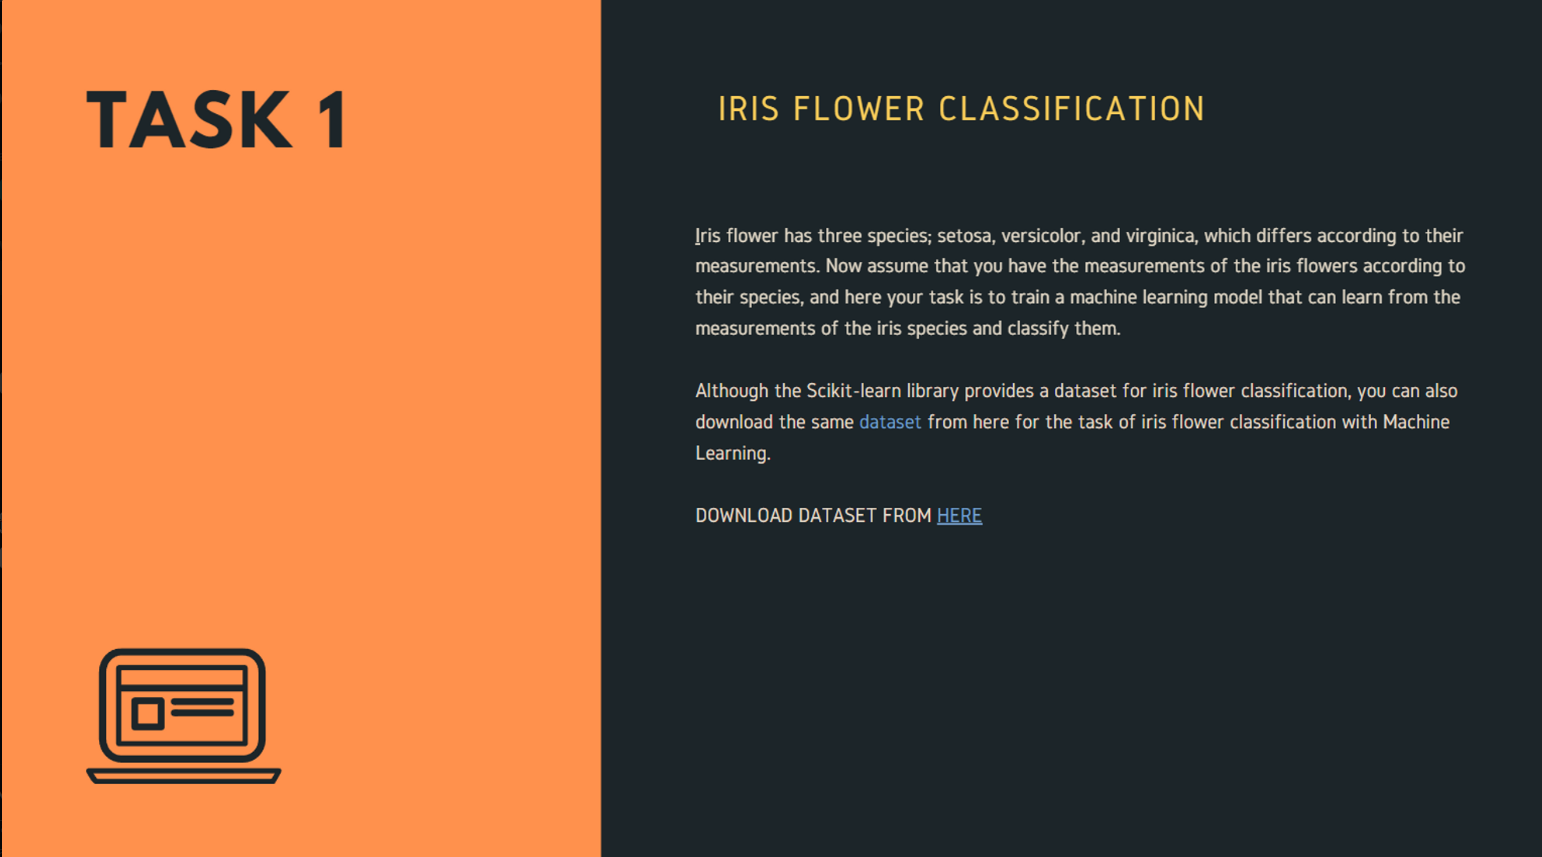**

# Step 1. Loading the Data

In [55]:

# Import Packages
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


- numpy library is used to perform computational operations
- matplotlib and seaborn are used for visualization
- pandas can help us to load data from various sources


In [56]:
columns = ['Sepal length', 'Sepal width', 'Petal length', 'Petal width', 'Class_labels'] # As per the iris dataset information


- we can load the data using pd.read_csv
- function - `pd.read_csv` is used to  reads csv files
- csv: comma seperated values


In [57]:
# Load the data
df = pd.read_csv('/iris.data', names=columns)


Note: All the numerical values will be printed in centimetre unit

In [58]:

df.head()

,Sepal length,Sepal width,Petal length,Petal width,Class_labels
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


- `df.head()` shows first 5 rows of the
dataset

In [59]:

# Some basic statistical analysis about the data
df.describe()



,Sepal length,Sepal width,Petal length,Petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


- this gives the description of the data we have provided
- it provides the description like percentile, mean, std, etc. of a data frame
or a series of numeric values.

# Step 2. Analyzing & Visualization

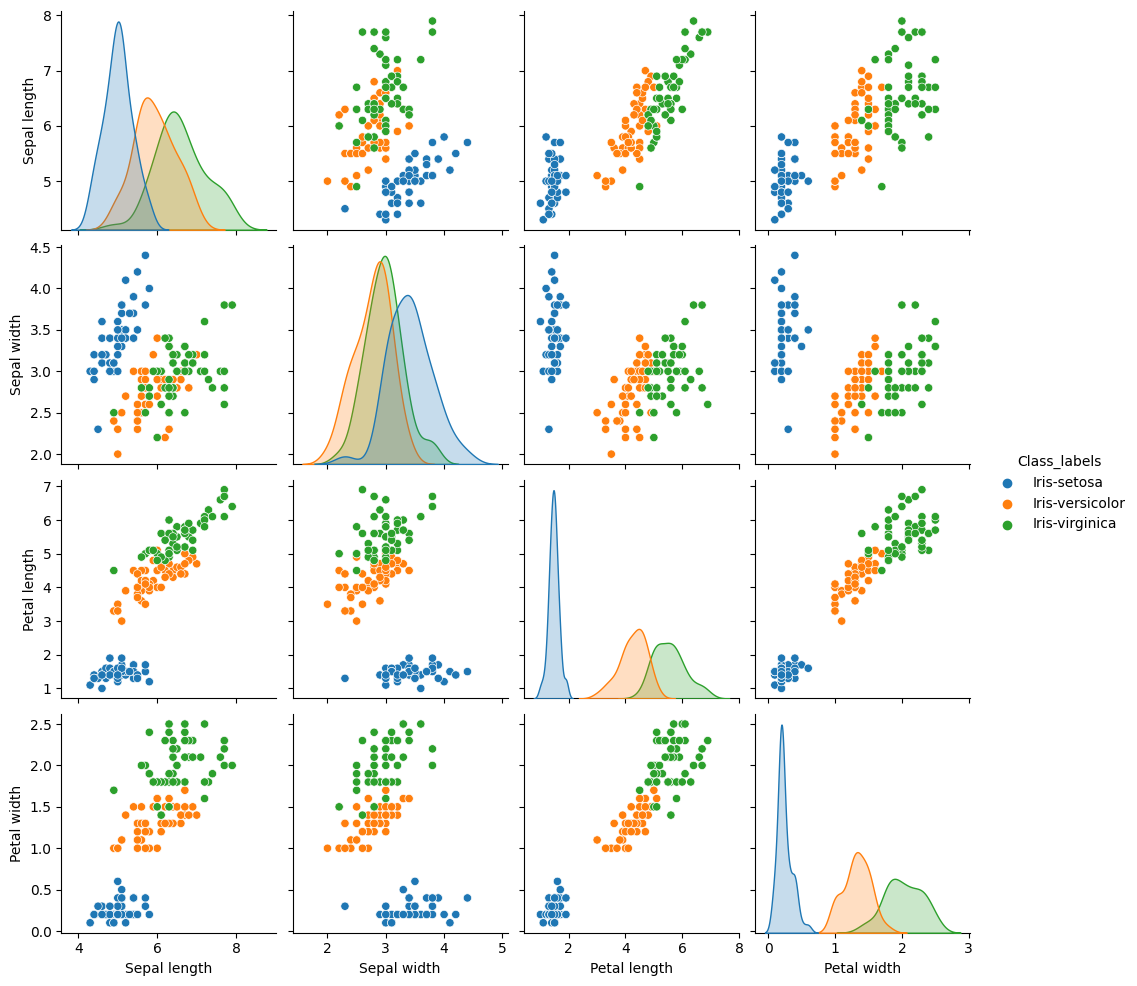

In [60]:

# Visualize the whole dataset
sns.pairplot(df, hue='Class_labels')

- now let us visualiza the data based on the numerical values we provided and along with the sepal length, sepal width, petal lenght, petal height
- the visualization is done by using
seaborn pair plot method
- it plots the information of whole dataset


In [61]:
# Seperate features and target
data = df.values
X = data[:,0:4]
Y = data[:,4]


-**`df`** refers to a DataFrame object which contains the  dataset. The **`.values`** attribute is used to retrieve the underlying NumPy array representation of the DataFrame.
- **`X = data[:, 0:4]`**: This line extracts the features from the **`data`** array. It uses NumPy array indexing to select all rows (**`:`**) and the columns from index 0 to 3 (0-based indexing). This means that the features are stored in the first four columns of the **`data`** array and are assigned to the variable **`X`**.

- **`Y = data[:, 4]`**: This line extracts the target variable from the **`data`** array. It uses NumPy array indexing similar to the previous line but only selects the column with index 4. This means that the target variable is stored in the fifth column of the **`data`** array and is assigned to the variable **`Y`**.

In [62]:
# Calculate avarage of each features for all classes
Y_Data = np.array([np.average(X[:, i][Y==j].astype('float32')) for i in range (X.shape[1]) for j in (np.unique(Y))])
Y_Data_reshaped = Y_Data.reshape(4, 3)
Y_Data_reshaped = np.swapaxes(Y_Data_reshaped, 0, 1)
X_axis = np.arange(len(columns)-1)
width = 0.25

- Np.average calculates the average from an array.
- Here we used two for loops inside a list. This is known as list comprehension.
- List comprehension helps to reduce the number of lines of code, it helps to iterate over the features and classes.
- The code reshapes **`Y_Data`** array from a 1D array to a 2D array with a shape of (4, 3). but we have 4 features for every 3 classes. So we reshaped Y_Data to a (4, 3) shaped array.
- 4 features and 3 classes, so we want to organize the average values accordingly.
- Then we change the axis of the reshaped matrix.
- After reshaping, the code swaps the axes of the reshaped array using **`np.swapaxes()`**. This is done to make it easier to plot the data later on.
- The code then creates an array called **`X_axis`** which will be used as the x-axis for the plot. It is initialized with values ranging from 0 to the number of features minus 1.

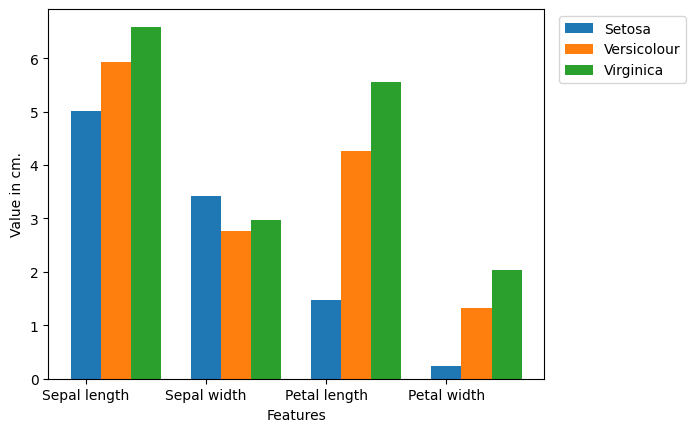

In [63]:

# Plot the avarage
plt.bar(X_axis, Y_Data_reshaped[0], width, label = 'Setosa')
plt.bar(X_axis+width, Y_Data_reshaped[1], width, label = 'Versicolour')
plt.bar(X_axis+width*2, Y_Data_reshaped[2], width, label = 'Virginica')
plt.xticks(X_axis, columns[:4])
plt.xlabel("Features")
plt.ylabel("Value in cm.")
plt.legend(bbox_to_anchor=(1.3,1))
plt.show()


we can clearly see the verginica is the longest and setosa is the shortest flower.

# Step 3 – Model training:

In [64]:
# Split the data to train and test dataset.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)



• Using train_test_split we split the whole data into training and testing datasets. Later we’ll use the testing dataset to check the accuracy of the model.

In [65]:
# Support vector machine algorithm
from sklearn.svm import SVC
svn = SVC()
svn.fit(X_train, y_train)

SVC()

- Here we imported a support vector classifier from the scikit-learn support vector machine.
- Then, we created an object and named it svn.
- After that, we feed the training dataset into the algorithm by using the svn.fit() method.

# Step 4 - Evaluating the Model

In [66]:

# Predict from the test dataset
predictions = svn.predict(X_test)



- Now we predict the classes from the test dataset using our trained model.
- Then we check the accuracy score of the predicted classes.
- accuracy_score() takes true values and predicted values and returns the percentage of accuracy.

- The classification report gives a detailed report of the prediction.


In [67]:

# Calculate the accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)



0.9

When we execute accuracy_score(y_test, predictions), it returns a value of 1.0. This means that the accuracy of the model on the given test dataset is 100% or perfect.

In [68]:

# A detailed classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))




                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         8
Iris-versicolor       0.82      0.90      0.86        10
 Iris-virginica       0.91      0.83      0.87        12

       accuracy                           0.90        30
      macro avg       0.91      0.91      0.91        30
   weighted avg       0.90      0.90      0.90        30



# Step 5 - Model Testing

In [69]:
X_new = np.array([[3, 2, 1, 0.2], [  4.9, 2.2, 3.8, 1.1 ], [  5.3, 2.5, 4.6, 1.9 ]])
#Prediction of the species from the input vector
prediction = svn.predict(X_new)
print("Prediction of Species: {}".format(prediction))


Prediction of Species: ['Iris-setosa' 'Iris-versicolor' 'Iris-versicolor']


• Here we take some random values based on the average plot to see if the model can predict accurately.

In [70]:

# Save the model
import pickle
with open('SVM.pickle', 'wb') as f:
    pickle.dump(svn, f)



In [71]:


# Load the model
with open('SVM.pickle', 'rb') as f:
    model = pickle.load(f)



- We can save the model using pickle format.
- And again we can load the model in any other program using pickle and use it using model.predict to predict the iris data.

In [72]:



model.predict(X_new)




array(['Iris-setosa', 'Iris-versicolor', 'Iris-versicolor'], dtype=object)

In this project, we gained hands-on experience in training a supervised machine learning model using the Iris Flower Classification Project with Machine Learning. Throughout this project, we obtained knowledge and skills related to machine learning, data analysis, data visualization, and model development, among other aspects.